In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [40]:
# Getting data set from local saved location 
data = pd.read_csv('/Users/jiakaithing/Desktop/COS30049_Computing_Technology_Innovation_Project/assignment2/Melbourne_housing_FULL.csv')


In [41]:
# Current data set
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [42]:
# Showing data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [43]:
# One-hot-encode function for clarity
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix).astype(int)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [44]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop rows with missing target values
    df = df.dropna(axis=0).reset_index(drop=True)

    # Dropping columns we do not need
    columns_to_drop = ['Price', 'Rooms', 'Address', 'Method', 'Date', 'Distance', 'Postcode', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount', 'SellerG']

    # Renaming column names
    df.rename(columns = {
        'Suburb': 'location', 
        'Type': 'property_type', 
        'Bedroom2': 'bedrooms', 
        'Bathroom': 'bathrooms',
        'Car': 'car_spaces', 
        'Landsize': 'land_size' 
        }, inplace=True)

    # One-hot encode nominal features
    column_dict = {
        'location': 'LO',
        'property_type': 'PT',
    }
    df = onehot_encode(df, column_dict)

    # Split df into X and y, 'Price' = y as it is the target
    y = df['Price'].copy()
    X = df.drop(columns_to_drop, axis=1).copy()

    return X, y

In [45]:
X, y = preprocess_inputs(data)

In [46]:
# Showing cleaned up data set
X

,bedrooms,bathrooms,car_spaces,land_size,LO_Abbotsford,LO_Aberfeldie,LO_Airport West,LO_Albanvale,LO_Albert Park,LO_Albion,...,LO_Williamstown North,LO_Windsor,LO_Wollert,LO_Wyndham Vale,LO_Yallambie,LO_Yarra Glen,LO_Yarraville,PT_h,PT_t,PT_u
0,2.0,1.0,0.0,156.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3.0,2.0,0.0,134.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3.0,1.0,2.0,120.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4.0,2.0,0.0,245.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,1.0,2.0,256.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8882,3.0,2.0,2.0,383.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
8883,3.0,2.0,2.0,404.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
8884,2.0,2.0,1.0,98.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8885,2.0,1.0,2.0,220.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [47]:
# Making sure there are no Null values in X
X.isna().sum()

bedrooms         0
bathrooms        0
car_spaces       0
land_size        0
LO_Abbotsford    0
                ..
LO_Yarra Glen    0
LO_Yarraville    0
PT_h             0
PT_t             0
PT_u             0
Length: 322, dtype: int64

In [48]:
# Making sure there are no Null values in y
y.isna().sum()

0

In [49]:
# Splitting the dataset into training and testing sets for both linear and polynomial regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialise and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict using the linear model
y_pred_linear = linear_model.predict(X_test)

# Calculate R^2 score for linear regression
linear_r2 = r2_score(y_test, y_pred_linear)
print(f"Linear Regression R^2 Score: {linear_r2}")

Linear Regression R^2 Score: 0.7068045864863919


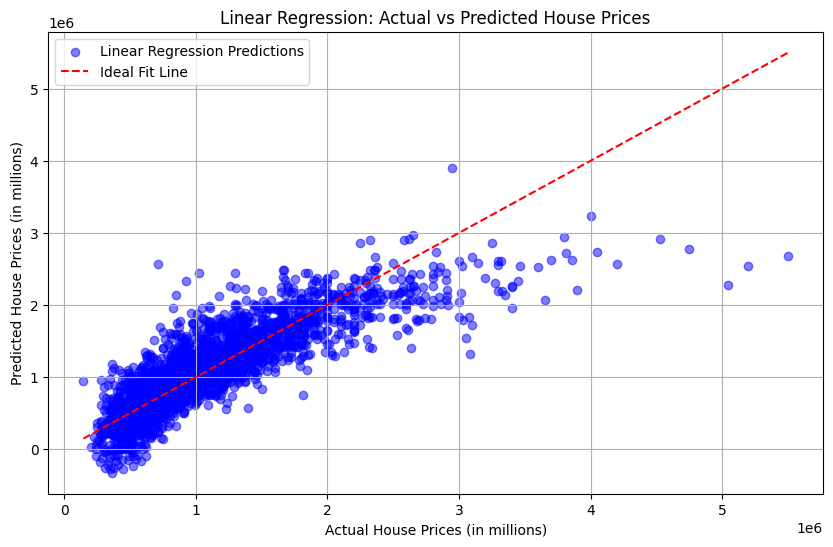

In [50]:
# Plot for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression Predictions', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit Line')
plt.xlabel('Actual House Prices (in millions)')
plt.ylabel('Predicted House Prices (in millions)')
plt.title('Linear Regression: Actual vs Predicted House Prices')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
# Polynomial Features (degree s)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test_poly = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Initialise and fit the linear regression model on polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

# Predict using the model
y_pred_poly = poly_model.predict(X_test)

# Calculate R^2 score
poly_r2 = r2_score(y_test, y_pred_poly)
print(f"Polynomial Regression R^2 Score (Degree 3): {poly_r2}")

Polynomial Regression R^2 Score (Degree 3): -6.727328572462125


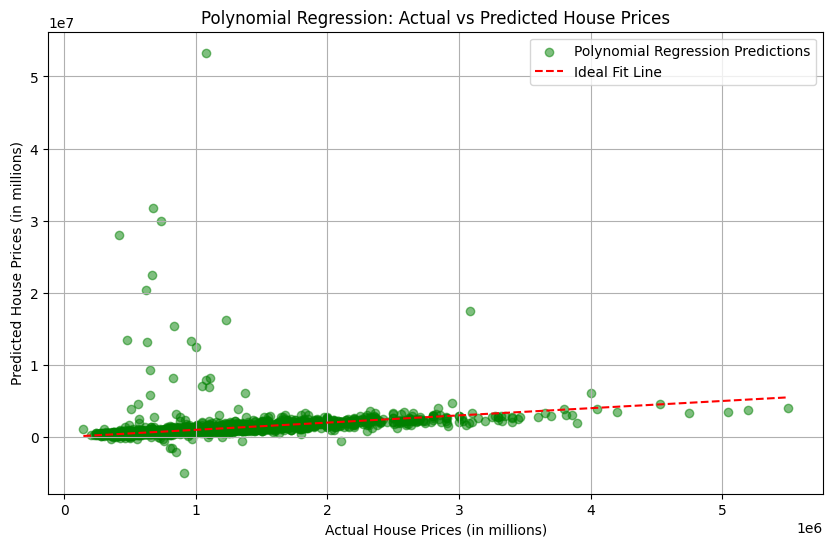

In [52]:
# Plot for Polynomial Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color='green', label='Polynomial Regression Predictions', alpha=0.5)
plt.plot([min(y_test_poly), max(y_test_poly)], [min(y_test_poly), max(y_test_poly)], color='red', linestyle='--', label='Ideal Fit Line')
plt.xlabel('Actual House Prices (in millions)')
plt.ylabel('Predicted House Prices (in millions)')
plt.title('Polynomial Regression: Actual vs Predicted House Prices')
plt.legend()
plt.grid(True)
plt.show()

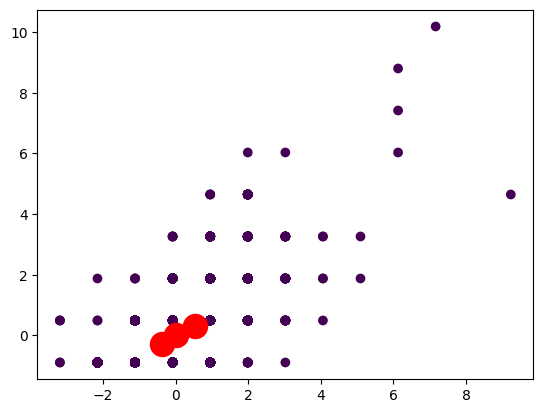

K-Means Cluster Labels: [0 0 0 ... 0 0 0]


In [53]:
# Scale the data before clustering (optional, but often recommended for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Example with 3 clusters
kmeans.fit(X_scaled)

# Labels and cluster centers
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Visualise the clusters (example for first two features)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red')  # Cluster centers
plt.show()

# Print cluster assignments
print(f"K-Means Cluster Labels: {labels}")

K-Means with 2 clusters has silhouette score: 0.0971
K-Means with 3 clusters has silhouette score: -0.0737
K-Means with 4 clusters has silhouette score: -0.1243
K-Means with 5 clusters has silhouette score: -0.1202
K-Means with 6 clusters has silhouette score: -0.1117
K-Means with 7 clusters has silhouette score: -0.1073
K-Means with 8 clusters has silhouette score: -0.1739
K-Means with 9 clusters has silhouette score: -0.1669
K-Means with 10 clusters has silhouette score: -0.1598

Best K-Means Params: n_clusters=2 with silhouette score: 0.0971


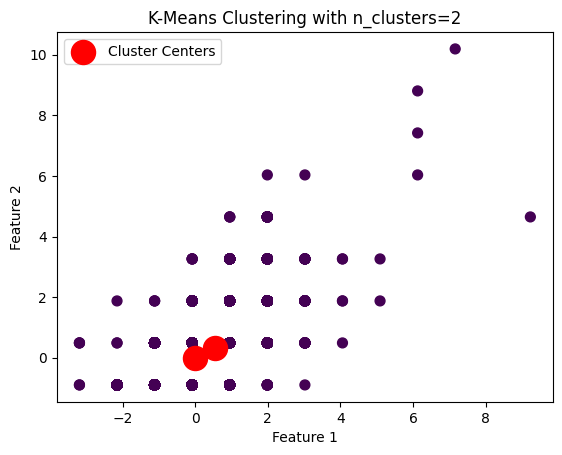

In [54]:
# Define the range for the number of clusters to test
cluster_range = range(2, 11)  # Testing from 2 to 10 clusters

# Initialise variables to track the best silhouette score and best number of clusters
best_score = -1
best_n_clusters = None
best_kmeans = None

# Loop over the cluster range and compute silhouette scores
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    
    # Calculate silhouette score
    score = silhouette_score(X_scaled, labels)
    print(f"K-Means with {n_clusters} clusters has silhouette score: {score:.4f}")
    
    # Track the best score and corresponding number of clusters
    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters
        best_kmeans = kmeans

# Output the best number of clusters and the best silhouette score
print(f"\nBest K-Means Params: n_clusters={best_n_clusters} with silhouette score: {best_score:.4f}")

# Plot the clustering with the best number of clusters
best_labels = best_kmeans.labels_
cluster_centers = best_kmeans.cluster_centers_

# Visualise the clustering (on the first two features for simplicity)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=best_labels, cmap='viridis', s=50)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', label='Cluster Centers')
plt.title(f"K-Means Clustering with n_clusters={best_n_clusters}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

DBSCAN with eps=0.2 and min_samples=3 has silhouette score: 0.0520
DBSCAN with eps=0.2 and min_samples=4 has silhouette score: -0.0811
DBSCAN with eps=0.2 and min_samples=5 has silhouette score: -0.1670
DBSCAN with eps=0.2 and min_samples=6 has silhouette score: -0.2227
DBSCAN with eps=0.2 and min_samples=7 has silhouette score: -0.2461
DBSCAN with eps=0.3 and min_samples=3 has silhouette score: 0.0971
DBSCAN with eps=0.3 and min_samples=4 has silhouette score: -0.0401
DBSCAN with eps=0.3 and min_samples=5 has silhouette score: -0.1338
DBSCAN with eps=0.3 and min_samples=6 has silhouette score: -0.1936
DBSCAN with eps=0.3 and min_samples=7 has silhouette score: -0.2258
DBSCAN with eps=0.4 and min_samples=3 has silhouette score: 0.1176
DBSCAN with eps=0.4 and min_samples=4 has silhouette score: -0.0204
DBSCAN with eps=0.4 and min_samples=5 has silhouette score: -0.1230
DBSCAN with eps=0.4 and min_samples=6 has silhouette score: -0.1819
DBSCAN with eps=0.4 and min_samples=7 has silhouett

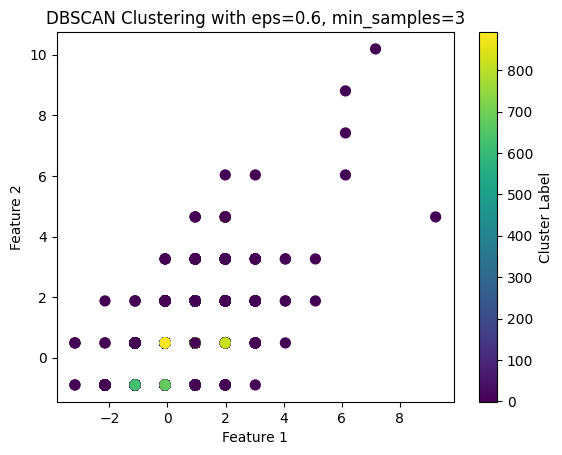

DBSCAN Cluster Labels: [  0  -1  -1 ...  -1  -1 626]


In [57]:
# Range of values to try for eps and min_samples
eps_values = [0.2, 0.3, 0.4, 0.5, 0.6]
min_samples_values = [3, 4, 5, 6, 7]

best_score = -1  # Initialise with a very low score
best_eps = None
best_min_samples = None

# Loop through each combination of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)  # Fit and predict DBSCAN clusters
        
        # Only calculate silhouette score if there's more than 1 cluster
        if len(set(labels)) > 1:
            score = silhouette_score(X_scaled, labels)
            print(f"DBSCAN with eps={eps} and min_samples={min_samples} has silhouette score: {score:.4f}")
            
            # Track best parameters based on highest silhouette score
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"\nBest DBSCAN params: eps={best_eps}, min_samples={best_min_samples} with silhouette score: {best_score:.4f}")

# Visualise the best DBSCAN clustering result with the best parameters
dbscan_best = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = dbscan_best.fit_predict(X_scaled)

# Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=best_labels, cmap='viridis', s=50, marker='o', label='DBSCAN Clusters')
plt.title(f"DBSCAN Clustering with eps={best_eps}, min_samples={best_min_samples}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster Label')
plt.show()

# Print the final cluster assignments
print(f"DBSCAN Cluster Labels: {best_labels}")